In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
tf.__version__

'2.4.1'

In [3]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('../saved_models/vehicle_model.h5')

In [4]:
size = (256, 256)
class_names = ['Articulated Truck', 'Background', 'Bicycle', 'Bus', 'Car', 'Motorcycle', 'Non Motorized Vehicle', 'Pedestrian', 'Pickup Truck', 'Single Unit Truck', 'Work Van']

def predict_image(x):
  """predict a given image"""
  
  img = tf.keras.preprocessing.image.smart_resize(x, size)
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  return (class_names[np.argmax(score)], round(100 * np.max(score), 2))

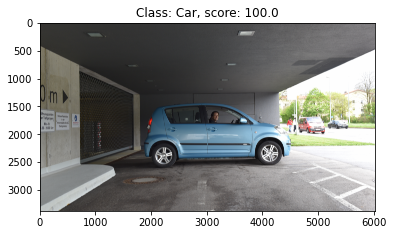

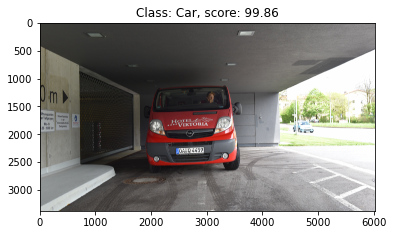

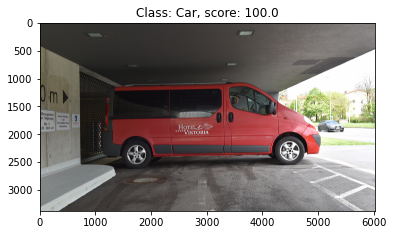

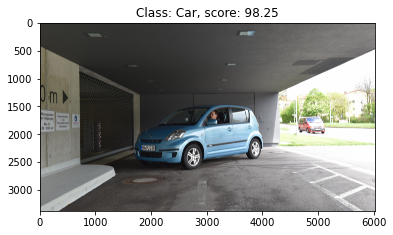

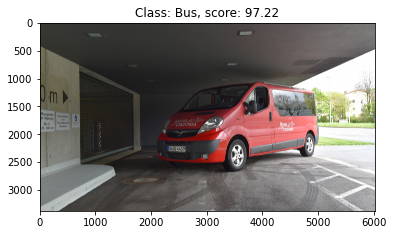

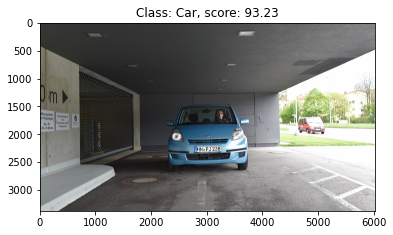

In [6]:
for filename in glob.glob('../datasets/images/*.JPG'): #assuming gif
    img = plt.imread(filename)
    cls, score = predict_image(img) # predict frame
    # display image
    plt.imshow(img)
    plt.title(f'Class: {cls}, score: {score}')
    plt.show()